In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defina a função Rectified Linear Unit (ReLU)
def ReLU(preactivation):
  # TODO: utilize a implementação do notebook anterior
  activation = np.clip(preactivation, a_min = 0, a_max = None)
  return activation

In [4]:
# Definir uma rede neural rasa com uma entrada, uma saída e três unidades ocultas
def shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO: utilize a implementação do notebook anterior

  # Calcular a saída da rede neural
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Ativar as unidades ocultas
  act_1 = ReLU(pre_1)
  act_2 = ReLU(pre_2)
  act_3 = ReLU(pre_3)

  # Ponderar as ativações
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Calcular a saída da rede neural
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Retornar tudo o que calculamos
  return y

In [5]:
# # Plote duas redes neurais rasas e a composição das duas
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plote as duas redes separadamente
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Entrada Rede 1'); ax[0].set_ylabel('Saída Rede 1')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Entrada Rede 2'); ax[1].set_ylabel('Saída Rede 2')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plote a composição delas
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Entrada Rede 1'); ax.set_ylabel('Saída Rede 2')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

Vamos definir duas redes. Vamos colocar os prefixos n1_ e n2_ antes de todas as variáveis para deixar claro qual rede é qual. Vamos considerar apenas as entradas e saídas no intervalo [-1,1].

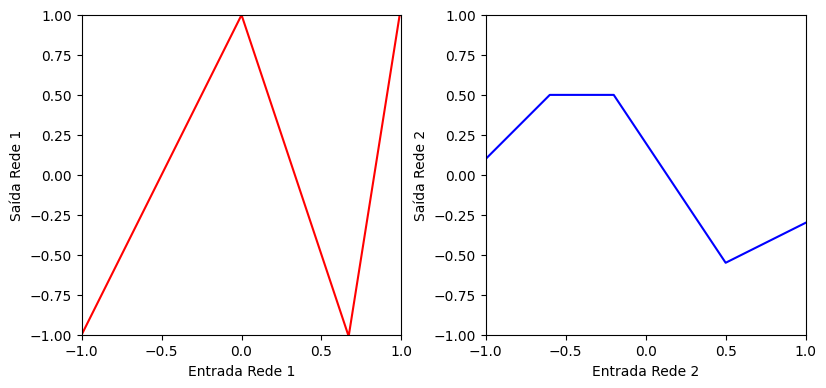

In [6]:
# Agora vamos definir alguns parâmetros e executar a primeira rede neural
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Agora vamos definir alguns parâmetros e executar a segunda rede neural
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Exibir as duas entradas
x = np.arange(-1,1,0.001)
# Rodamos a primeira e a segunda rede neural para cada um desses valores de entrada
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plote ambos os gráficos
plot_neural_two_components(x, net1_out, net2_out)

In [ ]:
# TODO
# Pegue um pedaço de papel e desenhe o que você acha que acontecerá quando alimentarmos
# a saída da primeira rede na segunda. Desenhe a relação entre
# a entrada da primeira rede e a saída da segunda.

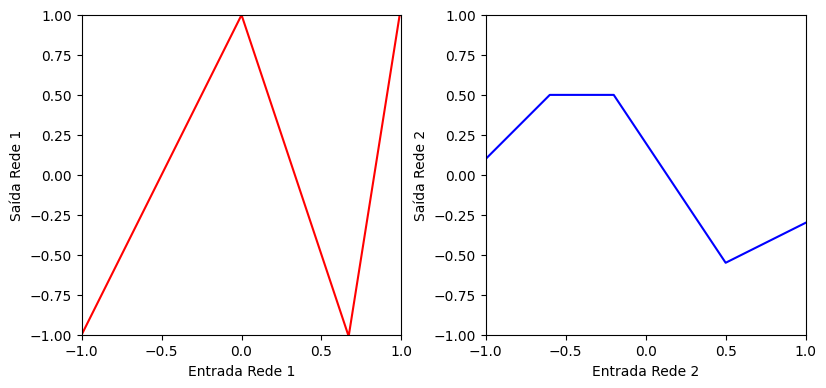

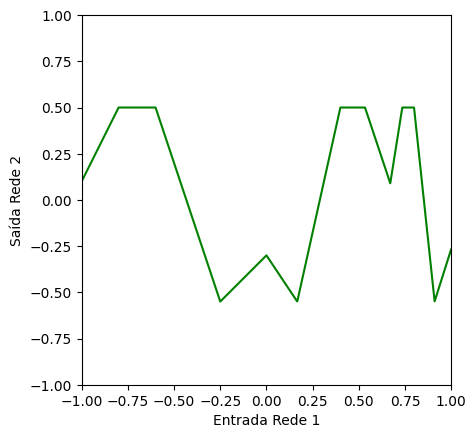

In [7]:
# Agora vamos ver se suas previsões estavam corretas

# TODO alimentar a saída da primeira rede na segunda rede (substitua esta linha)
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# Plote todos os três gráficos
plot_neural_two_components(x, net1_out, net2_out, net12_out)

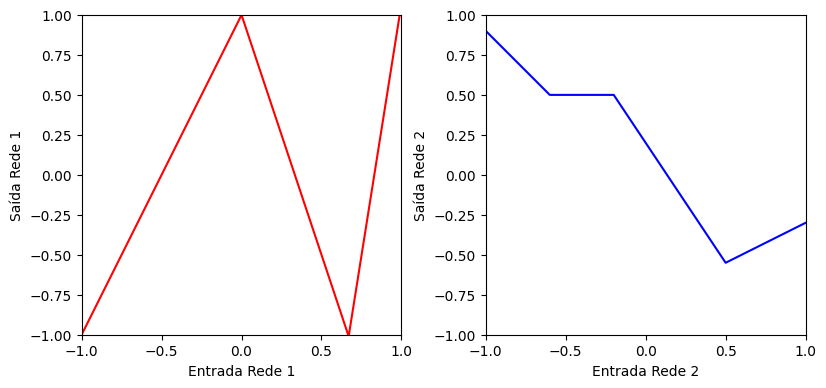

In [8]:
# Agora vamos mudar um pouco as coisas. O que acontece se mudarmos a segunda rede? (observe a mudança *-1)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [ ]:
# TODO
# Pegue um pedaço de papel e desenhe o que você acha que acontecerá quando alimentarmos a
# saída da primeira rede na segunda rede modificada. Desenhe a relação entre
# a entrada da primeira rede e a saída da segunda.

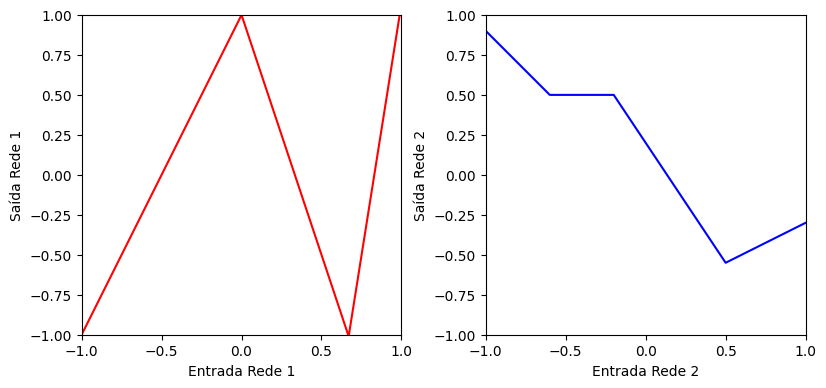

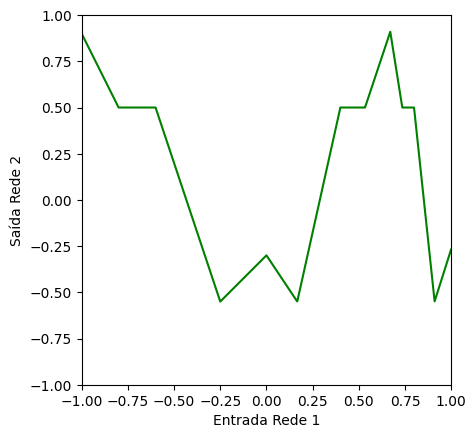

In [21]:
# Quando você tiver uma previsão, execute este código para ver se você estava certo

# TODO alimentar a saída da primeira rede na segunda rede modificada (substitua esta linha)
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

plot_neural_two_components(x, net1_out, net2_out, net12_out)

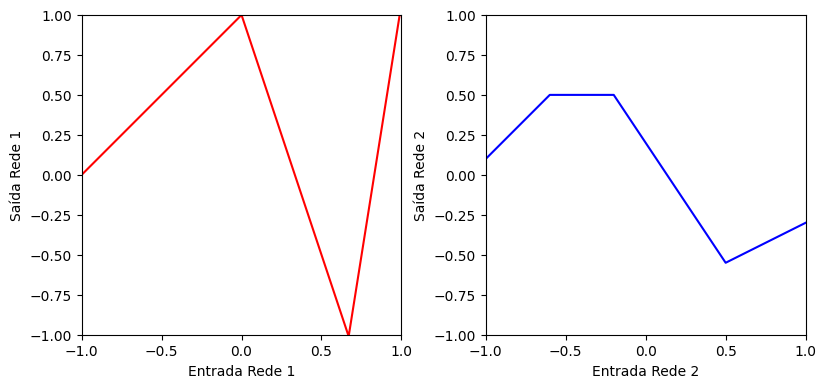

In [22]:
# Vamos mudar as coisas novamente. O que acontece se mudarmos a primeira rede? (observe as mudanças)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [ ]:
# TODO
# Pegue um pedaço de papel e desenhe o que você acha que acontecerá quando alimentarmos a
# saída da primeira rede modificada na segunda rede original. Desenhe a relação entre
# a entrada da primeira rede e a saída da segunda.

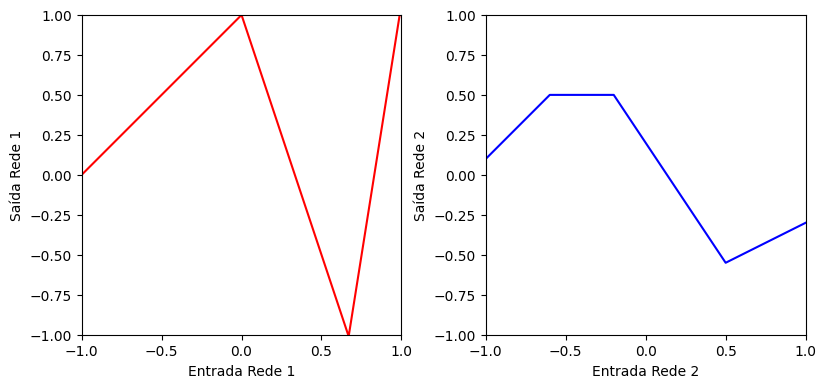

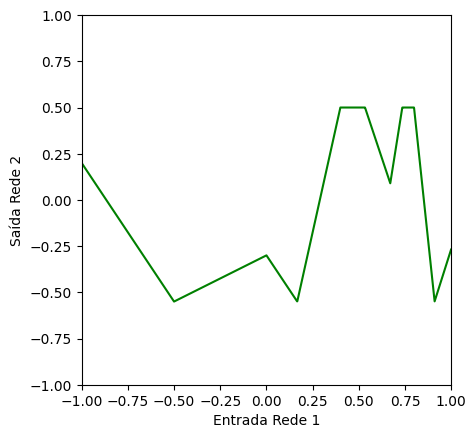

In [23]:
# Quando você tiver uma previsão, execute este código para ver se você estava certo

# TODO alimentar a saída da primeira rede modificada na segunda rede original (substitua esta linha)
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

plot_neural_two_components(x, net1_out, net2_out, net12_out)

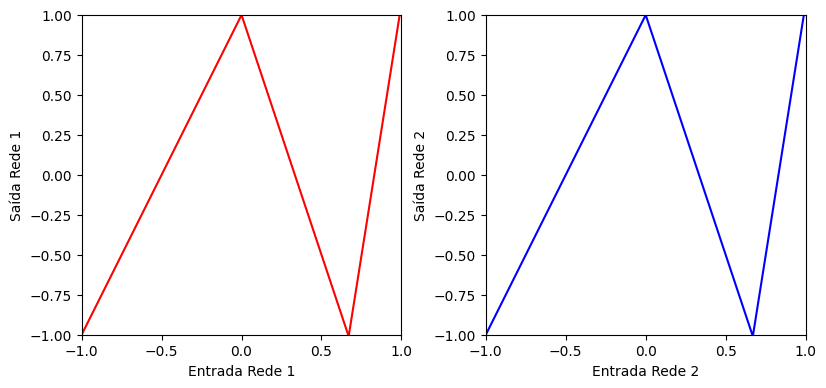

In [24]:
# Vamos mudar as coisas novamente. O que acontece se a primeira rede e a segunda rede forem iguais?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

In [ ]:
# TODO
# Pegue um pedaço de papel e desenhe o que você acha que acontecerá quando alimentarmos a
# saída da primeira rede em uma cópia dela mesma. Desenhe a relação entre
# a entrada da primeira rede e a saída da segunda.

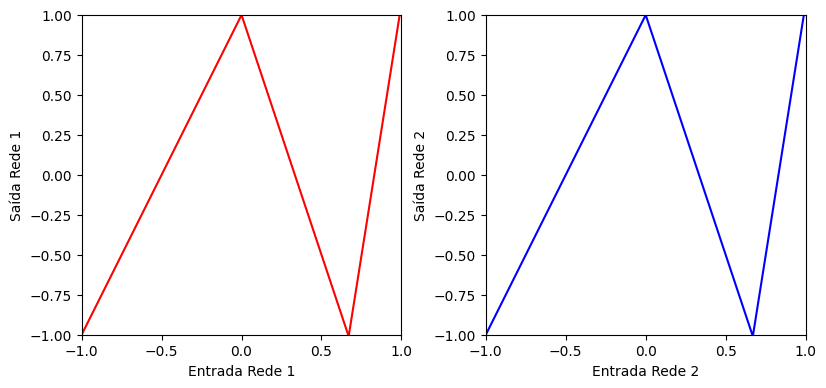

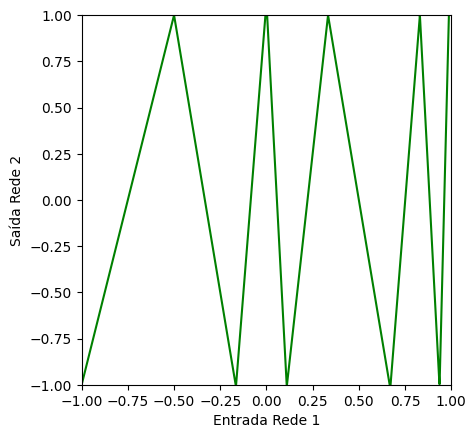

In [25]:
# Quando você tiver uma previsão, execute este código para ver se você estava certo

# TODO alimentar a saída da primeira rede em uma cópia dela (substitua esta linha)
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)

plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

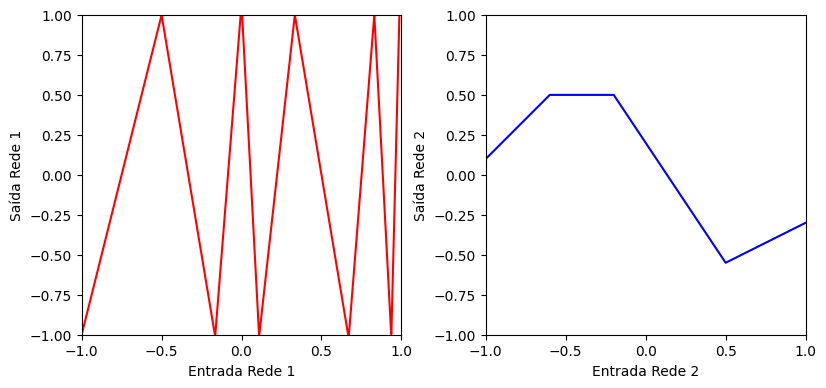

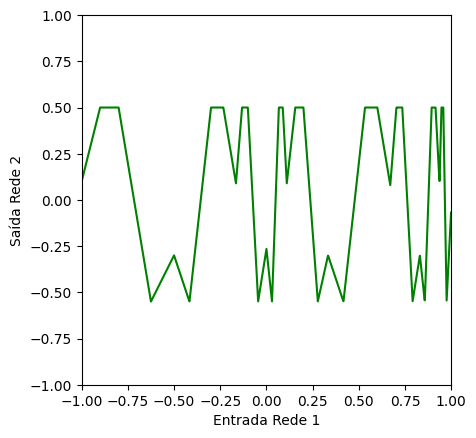

In [26]:
# TODO
# Contemple o que você acha que acontecerá quando alimentarmos a
# saída da primeira rede original em uma segunda cópia da primeira rede original, e então
# a saída disso na segunda rede original (agora temos uma rede de três camadas)
# Quantas regiões lineares totais teremos na saída?

# TODO alimentar a saída da primeira rede em uma cópia dela e a saída desta na segunda rede original (substitua esta linha)
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

plot_neural_two_components(x, net12_out, net2_out, net123_out)

In [ ]:
# TO DO
# Quantas regiões lineares haveria se executássemos N cópias da primeira rede, alimentando o resultado da primeira
# na segunda, a segunda na terceira e assim por diante, e depois passássemos o resultado para a segunda rede original
# (curva azul acima)

# Conclusão: com muito poucos parâmetros, podemos criar MUITAS regiões lineares, mas
# elas dependem umas das outras de maneiras complexas que rapidamente se tornam muito difíceis de entender intuitivamente.